# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install geopy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from geopy.geocoders import Nominatim

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities[0])
print(type(cities))

Number of cities in the list: 609
grytviken
<class 'list'>


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/3.0/onecall"
#https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    geolocator = Nominatim(user_agent="city_locator")
    location = geolocator.geocode(city)
    lat = location.latitude
    lon = location.longitude


    # Define the parameters
    params = {
        "lat": lat,
        "lon": lon,
        "appid": weather_api_key,
        "exclude": "minutely,hourly",  # Exclude parts of the data (optional)
    }    

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url,params = params)
        data = city_weather.json()
        print(data)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        data = city_weather.json()
        city_lat = data['lat']
        city_lng = data['lon']
        city_max_temp = data['daily'][0]['temp']['max']  # Max temperature from daily forecast
        city_humidity = data['current']['humidity']  # Current humidity
        city_clouds = data['current']['clouds']  # Current cloud coverage
        city_wind = data['current']['wind_speed']  # Current wind speed
        city_country = data.get('timezone', 'Unknown').split('/')[1]  # Extracting timezone, modify as needed
        city_date = data['current']['dt']  # Current date and time


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
{'lat': -54.2806, 'lon': -36.5098, 'timezone': 'Atlantic/South_Georgia', 'timezone_offset': -7200, 'current': {'dt': 1725578497, 'sunrise': 1725526568, 'sunset': 1725566009, 'temp': 272.95, 'feels_like': 270.33, 'pressure': 1015, 'humidity': 75, 'dew_point': 269.51, 'uvi': 0, 'clouds': 3, 'visibility': 10000, 'wind_speed': 2.11, 'wind_deg': 270, 'wind_gust': 2.61, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]}, 'daily': [{'dt': 1725544800, 'sunrise': 1725526568, 'sunset': 1725566009, 'moonrise': 1725529140, 'moonset': 1725576840, 'moon_phase': 0.08, 'summary': 'You can expect partly cloudy in the morning, with clearing in the afternoon', 'temp': {'day': 275.12, 'min': 272.92, 'max': 275.12, 'night': 272.93, 'eve': 273.27, 'morn': 273.82}, 'feels_like': {'day': 270.93, 'night': 269.96, 'eve': 269.97, 'morn': 269.42}, 'pressure': 1010, 'humidity': 92

AttributeError: 'NoneType' object has no attribute 'latitude'

In [12]:
print(type(city_data))
print(type(city_data[0]))
print(len(city_data))

<class 'list'>
<class 'dict'>
29


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          29
Lat           29
Lng           29
Max Temp      29
Humidity      29
Cloudiness    29
Wind Speed    29
Country       29
Date          29
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2806,-36.5098,275.12,75,3,2.11,South_Georgia,1725578497
1,georgetown,6.8137,-58.1624,305.90,80,64,1.97,Guyana,1725578499
2,bilibino,68.0550,166.4449,279.24,87,99,1.13,Anadyr,1725578500
3,mhamid,29.8249,-5.7198,312.08,36,51,3.90,Casablanca,1725578502
4,port-aux-francais,-49.3498,70.2200,278.71,90,100,15.16,Kerguelen,1725578504


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2806,-36.5098,275.12,75,3,2.11,South_Georgia,1725578497
1,georgetown,6.8137,-58.1624,305.90,80,64,1.97,Guyana,1725578499
2,bilibino,68.0550,166.4449,279.24,87,99,1.13,Anadyr,1725578500
3,mhamid,29.8249,-5.7198,312.08,36,51,3.90,Casablanca,1725578502
4,port-aux-francais,-49.3498,70.2200,278.71,90,100,15.16,Kerguelen,1725578504


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

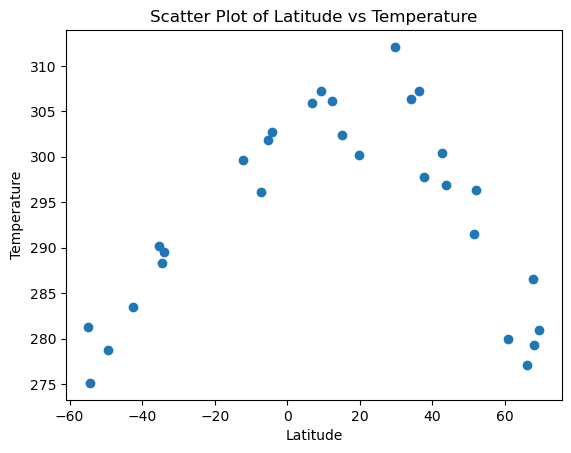

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

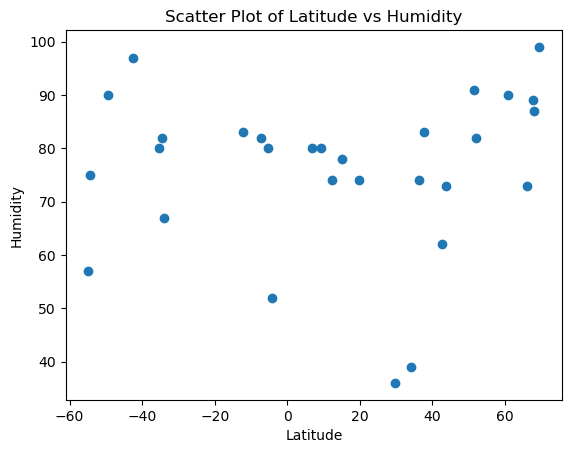

In [19]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Latitude vs Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

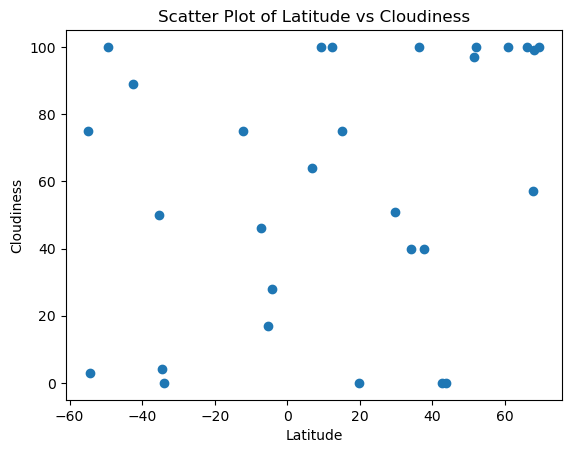

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Scatter Plot of Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

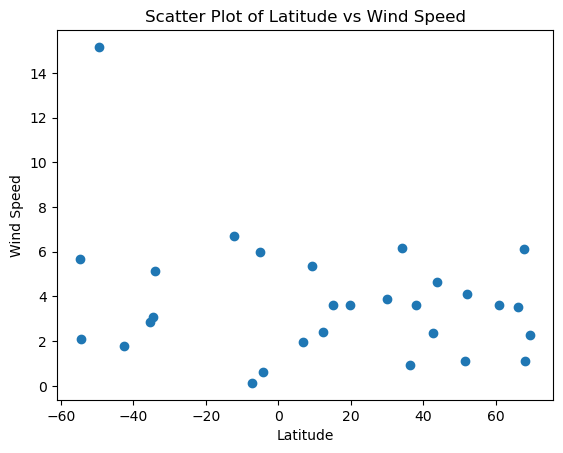

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Latitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regress(df, x, y):
   
    # Calculate linear regression statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    
    # Calculate regression values
    regress_values = df[x] * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot the data points and the regression line
    plt.scatter(df[x], df[y])
    plt.plot(df[x], regress_values, c='red', label=f'Linear Regression Line\n{line_eq}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid(True)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,georgetown,6.8137,-58.1624,305.90,80,64,1.97,Guyana,1725578499
2,bilibino,68.0550,166.4449,279.24,87,99,1.13,Anadyr,1725578500
3,mhamid,29.8249,-5.7198,312.08,36,51,3.90,Casablanca,1725578502
7,hilo,19.6854,-155.1004,300.15,74,0,3.60,Honolulu,1725578509
8,aykhal,65.9516,111.4918,277.04,73,100,3.53,Yakutsk,1725578511


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2806,-36.5098,275.12,75,3,2.11,South_Georgia,1725578497
4,port-aux-francais,-49.3498,70.2200,278.71,90,100,15.16,Kerguelen,1725578504
5,touros,-5.1999,-35.4595,301.85,80,17,5.99,Fortaleza,1725578506
6,chonchi,-42.6240,-73.7724,283.48,97,89,1.77,Santiago,1725578507
17,makamba,-4.1978,29.8074,302.73,52,28,0.60,Bujumbura,1725578526


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8576225034413575


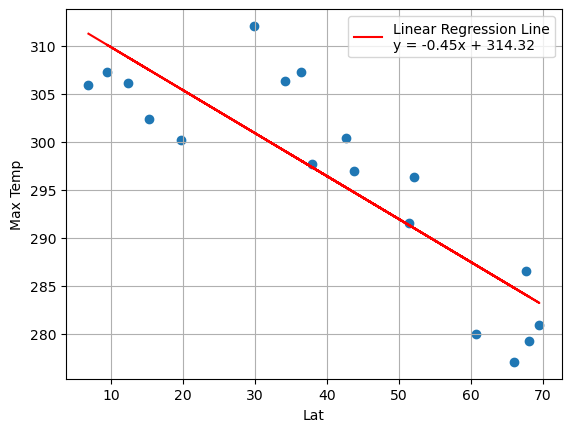

In [33]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.9678483075204731


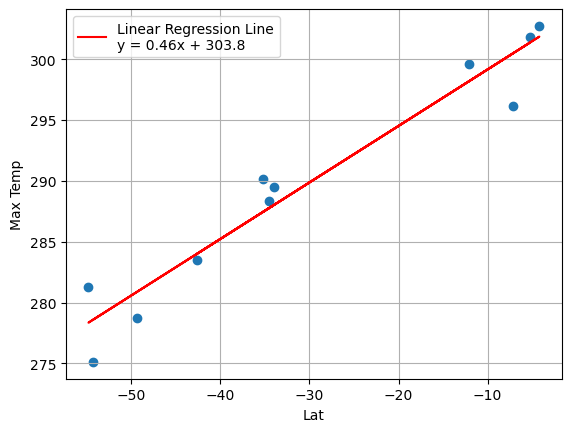

In [34]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3626270796670441


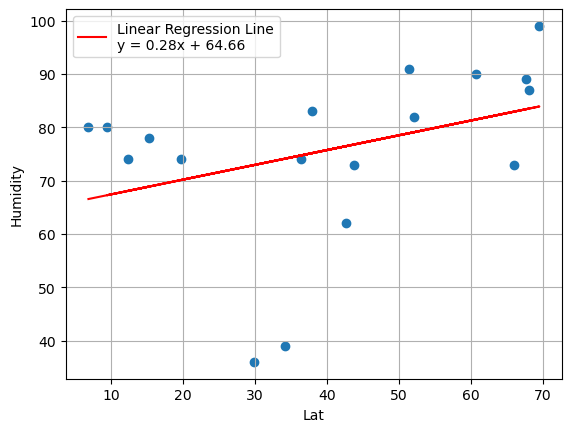

In [35]:
# Northern Hemisphere
linear_regress(northern_hemi_df, "Lat", "Humidity")

The r-value is: -0.11591500256397544


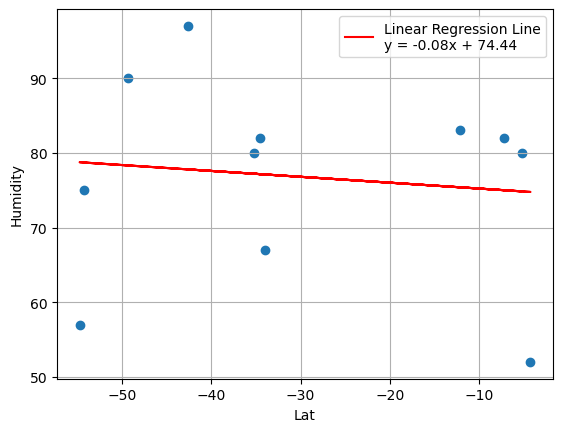

In [36]:
# Southern Hemisphere
linear_regress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.218331297622679


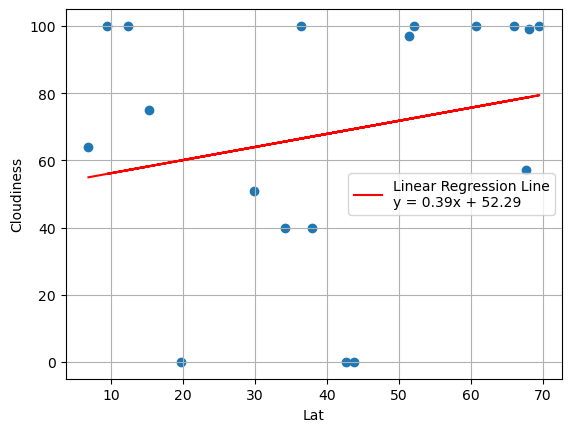

In [37]:
# Northern Hemisphere
linear_regress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: -0.219023475008547


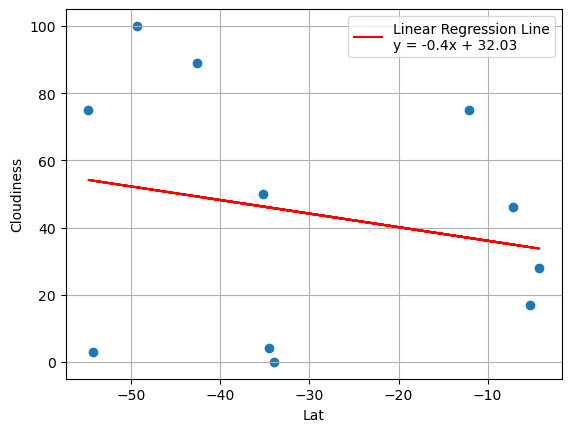

In [38]:
# Southern Hemisphere
linear_regress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.061514277354662146


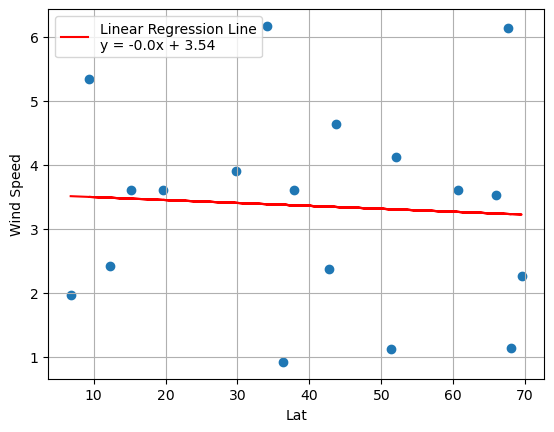

In [39]:
# Northern Hemisphere
linear_regress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.30761462620729013


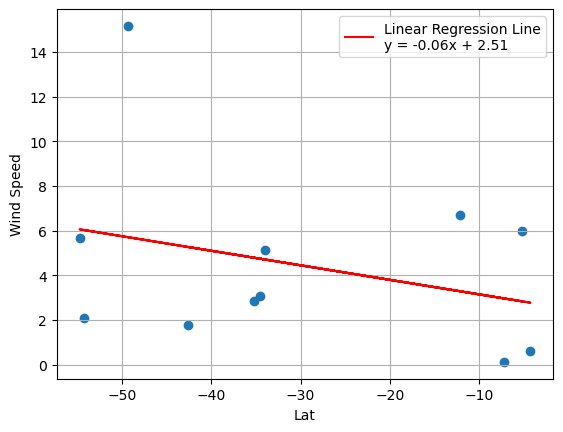

In [40]:
# Southern Hemisphere
linear_regress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE